In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime


# Información de los datos

In [ ]:
automobile_df = pd.read_csv('auto-mpg.csv')

# Ver 5 registros aleatorios
automobile_df.sample(5)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
217,30.0,4,111.0,80,2155,14.8,77,1,buick opel isuzu deluxe
378,38.0,4,105.0,63,2125,14.7,82,1,plymouth horizon miser
134,16.0,6,258.0,110,3632,18.0,74,1,amc matador
54,35.0,4,72.0,69,1613,18.0,71,3,datsun 1200
149,24.0,4,120.0,97,2489,15.0,74,3,honda civic


In [ ]:
#Tamaño del dataset
automobile_df.shape 


(398, 9)

In [ ]:
automobile_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# Preparación de Datos



In [ ]:
automobile_df.isnull().values.any()

False

In [ ]:
automobile_df = automobile_df.replace('?', np.nan)
automobile_df = automobile_df.dropna()
automobile_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
automobile_df.isnull().values.any()

False

# Eliminar columnas innecesarias

Asumamos que no es importante el origen y el modelo/nombre de carro

In [ ]:
automobile_df.drop(['origin', 'car name'], axis=1, inplace=True)

automobile_df.sample(5)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
179,22.0,4,121.0,98,2945,14.5,75
223,15.5,8,318.0,145,4140,13.7,77
357,32.9,4,119.0,100,2615,14.8,81
24,21.0,6,199.0,90,2648,15.0,70
362,24.2,6,146.0,120,2930,13.8,81


In [ ]:
automobile_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 24.5+ KB


Convertimos el fromato de año del modelo (model year) a año completo

In [ ]:
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)
automobile_df.sample(5)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
286,17.6,8,302.0,129,3725,13.4,1979
225,17.5,6,250.0,110,3520,16.4,1977
51,30.0,4,79.0,70,2074,19.5,1971
310,38.1,4,89.0,60,1968,18.8,1980
124,11.0,8,350.0,180,3664,11.0,1973


Agregamos los años que tiene los automoviles

In [ ]:
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])


In [ ]:
automobile_df.drop(['model year'], axis=1, inplace=True)


In [ ]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,52
1,15.0,8,350.0,165,3693,11.5,52
2,18.0,8,318.0,150,3436,11.0,52
3,16.0,8,304.0,150,3433,12.0,52
4,17.0,8,302.0,140,3449,10.5,52


In [ ]:
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')
automobile_df.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,46.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,40.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,43.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,46.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,49.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,52.000000


# Análisis de Datos 
con dos datos/columnas/variables

Se debe hacer un analisis de cada una de las variables y describir sus caracteristicas, para una mejor comprension del dataset.

Utilizaremos eñ grafico de dispresion de datos (scatter plot)

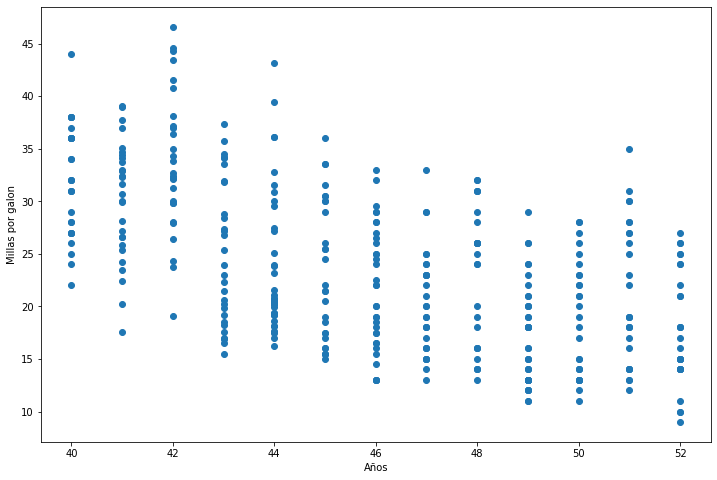

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['age'], automobile_df['mpg'])

plt.xlabel('Años')
plt.ylabel('Millas por galon');


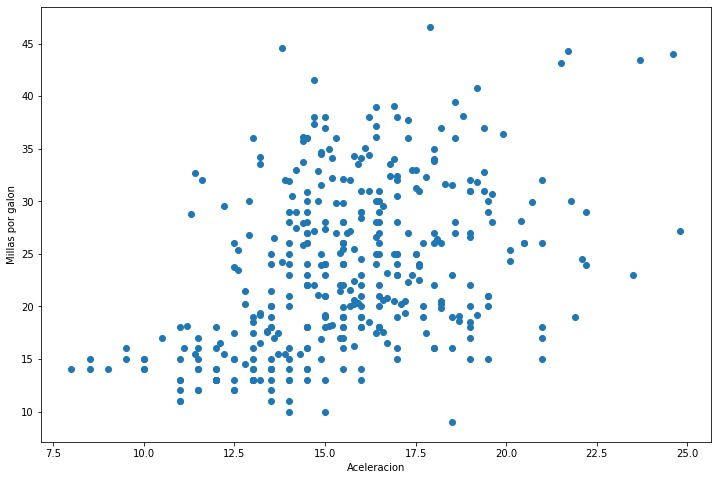

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])

plt.xlabel('Aceleracion')
plt.ylabel('Millas por galon');


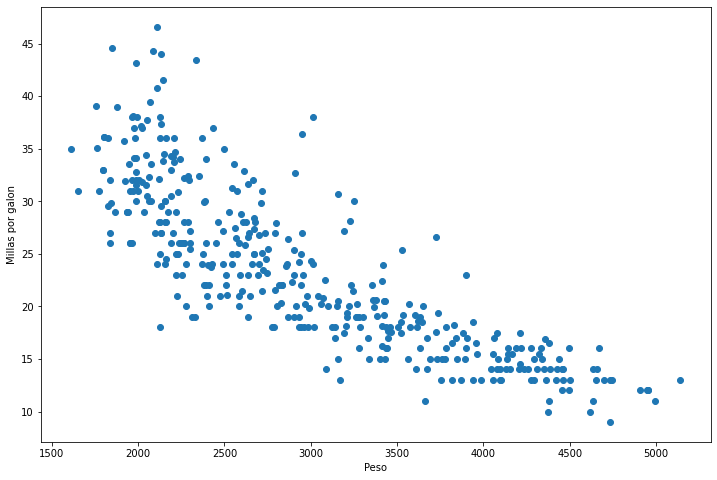

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['weight'], automobile_df['mpg'])

plt.xlabel('Peso')
plt.ylabel('Millas por galon');


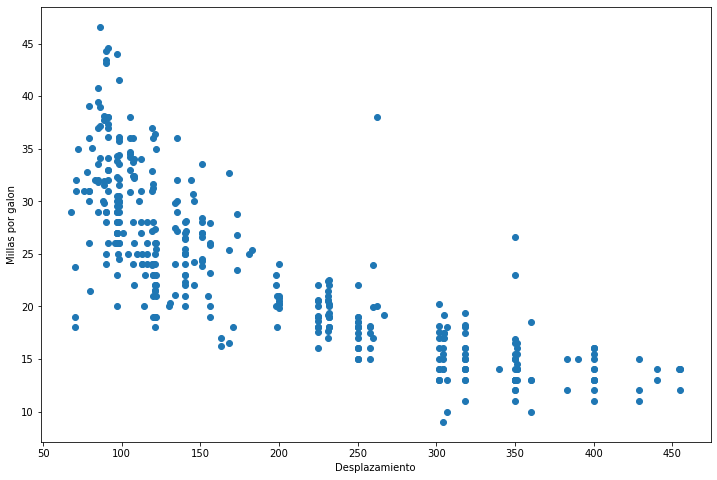

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['displacement'], automobile_df['mpg'])

plt.xlabel('Desplazamiento')
plt.ylabel('Millas por galon');


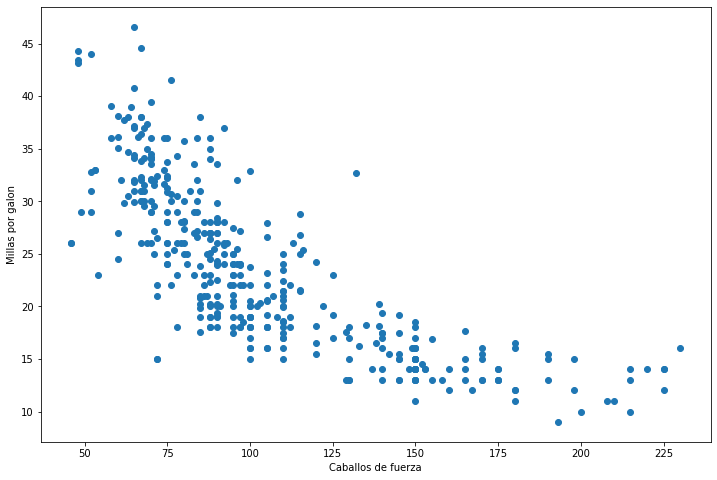

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])

plt.xlabel('Caballos de fuerza')
plt.ylabel('Millas por galon');


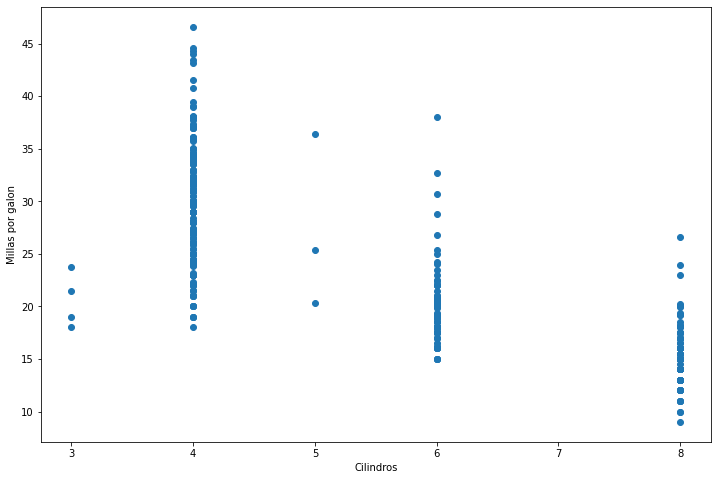

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['cylinders'], automobile_df['mpg'])

plt.xlabel('Cilindros')
plt.ylabel('Millas por galon');


# Correlación de Datos

In [ ]:
automobile_corr = automobile_df.corr()

automobile_corr


,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


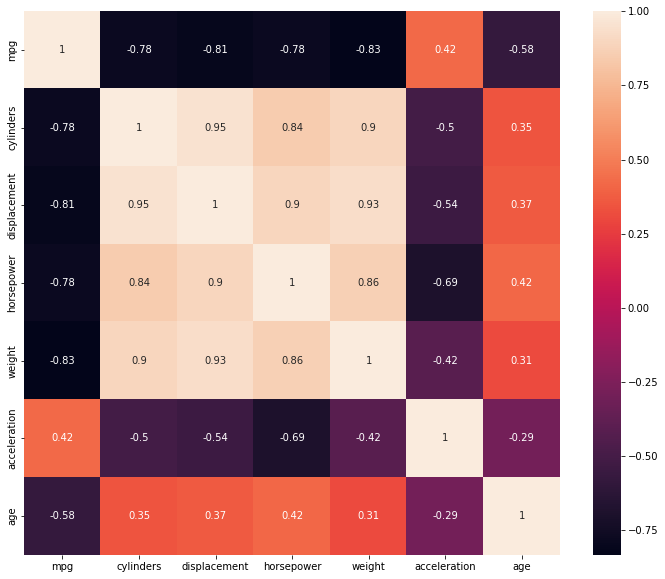

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(automobile_corr, annot=True);


In [ ]:
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)

automobile_df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,30.0,4,111.0,80,2155,14.8,45
1,20.2,6,232.0,90,3265,18.2,43
2,25.1,4,140.0,88,2720,15.4,44
3,19.4,6,232.0,90,3210,17.2,44
4,20.0,6,156.0,122,2807,13.5,49


In [ ]:
automobile_df.to_csv('auto-mpg-processed.csv', index=False)


# **Regresion Lineal**
# Regresion lineal con una caracteristica (horsepower)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [ ]:
X = automobile_df[['horsepower']]
y = automobile_df['mpg']
# separa los datos para entrenamiento y para prueba de forma aleatorio al azar
# tamaño de prueba es el 20% de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #20%


In [ ]:

linear_regression = linear_model.LinearRegression()
  
linear_regression.fit(X_train, y_train) 

# prediccion con los datos de entrenamiento
y_train_predicted = linear_regression.predict(X_train) 
# prediccion con los datos de prueba
y_test_predicted = linear_regression.predict(X_test)   

# calidad obtenida en el conjunto de datos de entrenamiento
train_MSD = mean_squared_error(y_train, y_train_predicted)
# error cuadratico medio
# calidad obtenida en el conjunto de datos de prueba
test_MSD = mean_squared_error(y_test, y_test_predicted)

print(train_MSD)
print(test_MSD)

23.083066366363635
27.725921763064303


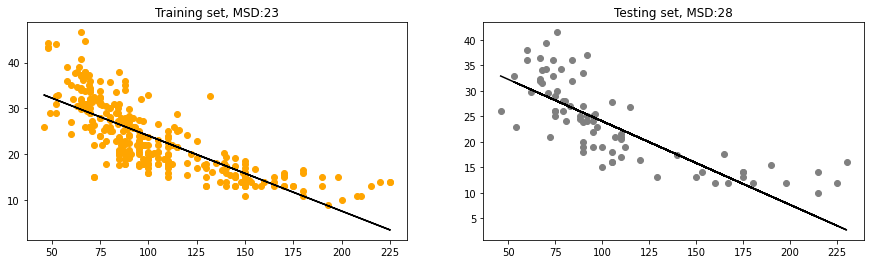

In [ ]:
# graficas de datos del entrenamiento y prueba
fig, axs = plt.subplots(1,2, figsize=(15,4)) 
axs[0].scatter(X_train, y_train,  color='orange')
axs[0].plot(X_train, y_train_predicted, color='black')
axs[0].set_title('Training set, MSD:{:.0f}'.format(train_MSD))

axs[1].scatter(X_test, y_test,  color='gray')
axs[1].plot(X_test, y_test_predicted, color='black')
axs[1].set_title('Testing set, MSD:{:.0f}'.format(test_MSD))

plt.show()

La fiabilidad de los test es de más del 99% cuando confirma la paternidad y del 100% cuando la prueba es negativa. Por tanto, la manera de engañarla es proporcionando una muestra que no corresponda a quien presuntamente está siendo analizado.

El error comienza desde la recoleccion de los datos
30 y 40% de error
Si el trabajo es sobre enfermedades el error tiene que ser minimo
O para pruebas de enbarazo
Nesmaneasisi, dengue, error del 10% para abajo

Prueba de vehiculos -: si acerto no no no afecta mucho
Revicion de los datos 
Imputacion adecuada de los datos 
Todo depende que estemos trabajando